<a href="https://colab.research.google.com/github/larissavvsous/Mineracao-de-Dados/blob/main/Aula_01_Classificacao_MNIST_UFC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

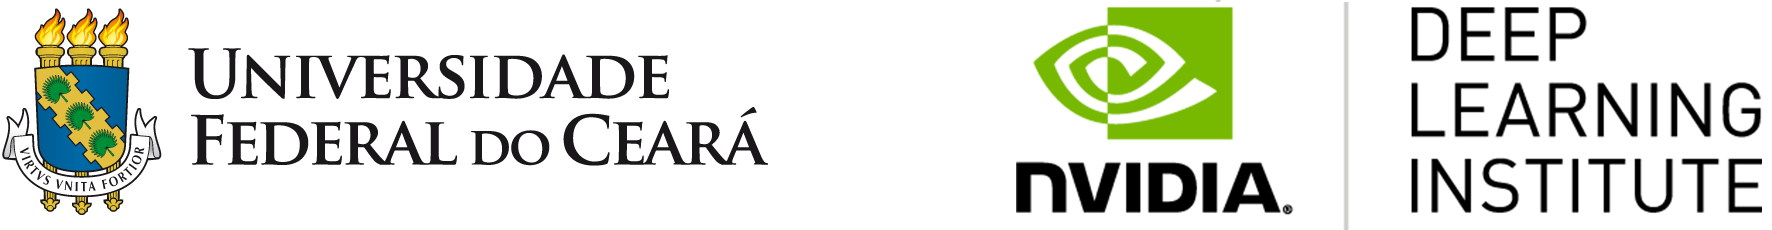

# Classificação de Imagens com o Dataset MNIST

Nesta seção, faremos o "Hello World" do Deep Learning: treinando um modelo de aprendizado profundo para classificar corretamente os dígitos escritos à mão.

## Objetivos

* Entender como oDeep Learning pode resolver problemas que os métodos de programação tradicionais não podem
* Aprender sobre o [dataset MNIST de dígitos escritos a mão](http://yann.lecun.com/exdb/mnist/)
* Usar a [API do Keras](https://keras.io/) para carregar o MNIST dataset e prepará-lo para o treinamento
* Criar uma rede neural simples para desempenhar a classificação de imagens
* Treinar a rede neural usando o dataset MNIST ajustado ao problema
* Observar o desempenho do treinamento da rede neural

## O Problema: Classificar Imagens Corretamente

Na programação tradicional, o programador é capaz de articular regras e condições em seu código que seu programa pode usar para agir da maneira correta. Essa abordagem continua a funcionar excepcionalmente bem para uma grande variedade de problemas.

A classificação de imagem, que pede a um programa para classificar corretamente uma imagem que nunca viu antes em sua classe correta, é quase impossível de resolver com técnicas de programação tradicionais. Como poderia um programador definir as regras e condições para classificar corretamente uma enorme variedade de imagens, especialmente levando em conta imagens que nunca viu?

## A Solução: Usar Deep Learning

O Deep Learning se destaca no reconhecimento de padrões por tentativa e erro. Ao treinar uma rede neural profunda com dados suficientes e fornecer à rede feedback sobre seu desempenho por meio de treinamento, a rede pode identificar, apesar de uma grande quantidade de iterações, seu próprio conjunto de condições pelas quais pode agir da maneira correta.

## O Dataset MNIST

Na história do aprendizado profundo, a classificação precisa da imagem do [MNIST dataset](http://yann.lecun.com/exdb/mnist/), uma coleção de 70.000 imagens em tons de cinza de dígitos manuscritos de 0 a 9, foi um grande desenvolvimento. Embora hoje o problema seja considerado trivial, fazer classificação de imagens com MNIST tornou-se uma espécie de "Hello World" para deep learning.

Aqui estão 40 das imagens incluídas no conjunto de dados MNIST:

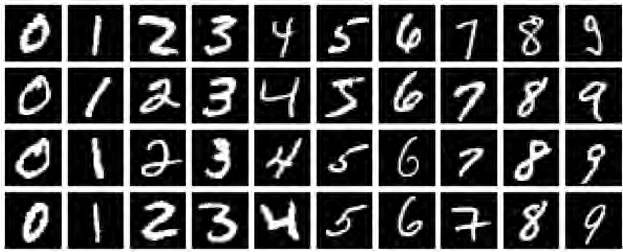

## Trainamento e Validação de Dados e Labels

Ao trabalhar com imagens para aprendizado profundo, precisamos das próprias imagens, geralmente denotadas como `X`, e também corretas [labels](https://developers.google.com/machine-learning/glossary#label) para essas imagens, geralmente denotadas como `Y`. Além disso, precisamos dos valores `X` e `Y` para *treinar* o modelo e, em seguida, um conjunto separado de valores `X` e `Y` para *validar* o desempenho do modelo após ele ter sido treinado. Portanto, precisamos de 4 segmentos de dados para o conjunto de dados MNIST:

1. `x_train`: Imagem us\ada para treinar a rede neural
2. `y_train`: Labels corretos para as imagens `x_train`, usada para avaliar o modelo de predição durante o treinamento
3. `x_valid`: Conjunto de imagens deixadas de lado para validar o desempenho do modelo depois de treinado
4. `y_valid`: Label correto para as imagens `x_valid` images, usado para avaliar as previsões do modelo depois de treinado

O processo de preparação de dados para análise é chamado [Data Engineering](https://medium.com/@rchang/a-beginners-guide-to-data-engineering-part-i-4227c5c457d7). Para saber mais sobre as diferenças entre dados de treinamento e dados de validação (bem como dados de teste), confira[this article](https://machinelearningmastery.com/difference-test-validation-datasets/) por Jason Brownlee.

## Carregando os dados em Memória (com o Keras)

Há muitos [frameworks deep learning](https://developer.nvidia.com/deep-learning-frameworks), cada um com seus próprios méritos. Nós iremos trabalhar com o [Tensorflow 2](https://www.tensorflow.org/tutorials/quickstart/beginner), e especialmente com a [API do Keras](https://keras.io/). O Keras tem muitas funções integradas úteis projetadas para as tarefas de visão computacional. Também é uma escolha legítima para aprendizado profundo em um ambiente profissional devido à sua [confiabilidade](https://blog.pragmaticengineer.com/readable-code/) e eficiência, embora não esteja sozinho nesse aspecto, e vale a pena investigar uma variedade de estruturas ao iniciar um projeto de aprendizado profundo.

Um dos muitos recursos úteis que o Keras fornece são os módulos que contêm muitos métodos auxiliares para [datasets comuns](https://www.tensorflow.org/api_docs/python/tf/keras/datasets), incluindo MNIST.

Começaremos carregando o módulo de conjunto de dados Keras para MNIST:

In [ ]:
from tensorflow.keras.datasets import mnist

Com o módulo `mnist`, podemos facilmente carregar os dados MNIST, já particionados em imagens e rótulos para treinamento e validação:

In [ ]:
# the data, split between train and validation sets
(x_train, y_train), (x_valid, y_valid) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


## Explorando os dados do MNIST

Afirmamos acima que o conjunto de dados MNIST continha 70.000 imagens em escala de cinza de dígitos manuscritos. Ao executar as células a seguir, podemos ver que Keras particionou 60.000 dessas imagens para treinamento e 10.000 para validação (após o treinamento) e também que cada imagem em si é um array 2D com as dimensões 28x28:

In [ ]:
x_train.shape

(60000, 28, 28)

In [ ]:
x_valid.shape

(10000, 28, 28)

Além disso, podemos ver que essas imagens de 28 x 28 são representadas como uma coleção de valores inteiros de 8 bits não assinados entre 0 e 255, os valores correspondentes ao valor de escala de cinza de um pixel em que `0` é preto, `255` é branco e todos os outros os valores estão entre:

In [ ]:
x_train.dtype

dtype('uint8')

In [ ]:
x_train.min()

0

In [ ]:
x_train.max()

255

In [ ]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

Usando [Matplotlib](https://matplotlib.org/), podemos renderizar uma dessas imagens em tons de cinza em nosso conjunto de dados:

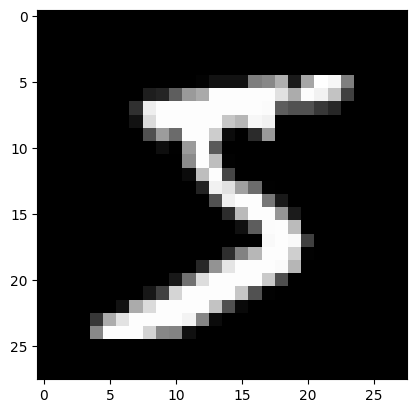

In [ ]:
import matplotlib.pyplot as plt

image = x_train[0]
plt.imshow(image, cmap='gray')

Desta forma, podemos ver que esta é uma imagem de 28x28 pixels de um 5. Ou é um 3? A resposta está nos dados y_train, que contém os rótulos corretos para os dados. Vamos dar uma olhada:

In [ ]:
y_train[0]

5

## Preparação dos Dados para o Treinamento

Em deep learning, é comum que os dados precisem ser transformados para ficarem no estado ideal para o treinamento. Para este problema específico de classificação de imagens, existem 3 tarefas que devemos realizar com os dados em preparação para o treinamento:
1. Achatar (Flatten) os dados da imagem, para simplificar a entrada da imagem no modelo.
2. Normalizar os dados da imagem, facilita o trabalho ajustando os valores de entrada da imagem para o modelo.
3. Categorizar os rótulos, para facilitar o trabalho com os valores do rótulo para o modelo.

### Achatando os Dados da Imagem

Embora seja possível para um modelo de aprendizado profundo aceitar uma imagem bidimensional (no nosso caso, 28 x 28 pixels), vamos simplificar as coisas para começar e [reshape](https://www.tensorflow.org/api_docs/python/tf/reshape) cada imagem em uma única matriz de 784 pixels contínuos (nota: 28x28 = 784). Isso também é chamado de nivelamento da imagem.

Aqui nós realizamos isso usando o método auxiliar `reshape`:

In [ ]:
x_train = x_train.reshape(60000, 784)
x_valid = x_valid.reshape(10000, 784)

Podemos confirmar que os dados da imagem foram reformulados e agora são uma coleção de matrizes 1D contendo 784 valores de pixel cada:

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,  18,  18,
       126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 17

### Normalizando os Dados da Imagem

Os modelos de aprendizado profundo são melhores para lidar com números de ponto flutuante entre 0 e 1 (falaremos mais sobre esse tópico posteriormente). Converter valores inteiros em valores de ponto flutuante entre 0 e 1 é chamado de [normalização](https://developers.google.com/machine-learning/glossary#normalization), e uma abordagem simples que usaremos aqui para normalizar os dados será para dividir todos os valores de pixel (que, se você se lembra, estão entre 0 e 255) por 255:

In [ ]:
x_train = x_train / 255
x_valid = x_valid / 255

Agora podemos ver que os valores são todos valores de ponto flutuante entre `0.0` e `1.0`:

In [ ]:
x_train.dtype

dtype('float64')

In [ ]:
x_train.min()

0.0

In [ ]:
x_train.max()

1.0

### Codificação categórica (Encoding)

Considere por um momento, se perguntássemos, quanto é 7 - 2? Afirmar que a resposta foi 4 é mais próximo do que afirmar que a resposta foi 9. No entanto, para este problema de classificação de imagens, não queremos que a rede neural aprenda esse tipo de raciocínio: queremos apenas que ela selecione a categoria correta e entenda que se tivermos uma imagem do número 5, adivinhar o 4 é tão ruim quanto adivinhar o 9.

Tal como está, os rótulos das imagens são inteiros entre 0 e 9. Como esses valores representam um intervalo numérico, o modelo pode tentar tirar algumas conclusões sobre seu desempenho com base no quão próximo da categoria numérica correta ele supõe.

Portanto, faremos algo com nossos dados chamado codificação categórica. Esse tipo de transformação modifica os dados para que cada valor seja uma coleção de todas as categorias possíveis, com a categoria real em que esse valor específico é definido como verdadeiro.

Como um exemplo simples, considere se tivéssemos 3 categorias: vermelho, azul e verde. Para uma determinada cor, 2 dessas categorias seriam falsas e a outra seria verdadeira:

|Actual Color| Is Red? | Is Blue? | Is Green?|
|------------|---------|----------|----------|
|Red|True|False|False|
|Green|False|False|True|
|Blue|False|True|False|
|Green|False|False|True|

Em vez de usar "True" ou "False", poderíamos representar o mesmo usando binário, 0 ou 1:

|Actual Color| Is Red? | Is Blue? | Is Green?|
|------------|---------|----------|----------|
|Red|1|0|0|
|Green|0|0|1|
|Blue|0|1|0|
|Green|0|0|1|

É isso que é a codificação categórica, transformando valores que devem ser entendidos como rótulos categóricos em uma representação que torna sua natureza categórica explícita para o modelo. Assim, se estivéssemos usando esses valores para treinamento, converteríamos...

```python
values = ['red, green, blue, green']
```

... que uma rede neural teria muita dificuldade em entender, em vez de:

```python
values = [
    [1, 0, 0],
    [0, 0, 1],
    [0, 1, 0],
    [0, 0, 1]
]
```

### Codificando categoricamente os rótulos (labels)

O Keras fornece um utilitário para [codificação de valores categóricos](https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical) e aqui o usamos para realizar codificação categórica para os rótulos de treinamento e validação :

In [ ]:
import tensorflow.keras as keras
num_categories = 10

y_train = keras.utils.to_categorical(y_train, num_categories)
y_valid = keras.utils.to_categorical(y_valid, num_categories)

Aqui estão os primeiros 10 valores dos rótulos de treinamento, que você pode ver agora foram codificados categoricamente:

In [ ]:
y_train[0:9]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## Criação do Modelo

Com os dados preparados para o treinamento, agora é hora de criar o modelo que vamos treinar com os dados. Este primeiro modelo básico será composto por várias *camadas* e será composto por 3 partes principais:

1. Uma camada de entrada, que receberá dados em algum formato esperado
2. Várias [camadas ocultas](https://developers.google.com/machine-learning/glossary#hidden-layer), cada uma composta por muitos *neurônios*. Cada [neurônio](https://developers.google.com/machine-learning/glossary#neuron) terá a capacidade de afetar a estimativa da rede com seus *pesos*, que são valores que serão atualizados ao longo de muitas iterações conforme o rede obtém feedback sobre seu desempenho e aprende
3. Uma camada de saída, que representará a estimativa da rede para uma determinada imagem

### Instanciando o Modelo

Para começar, usaremos a classe de modelo [Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) do Keras para instanciar uma instância de um modelo que terá uma série de camadas que os dados passar em sequência:

In [ ]:
from tensorflow.keras.models import Sequential

model = Sequential()

### Criando o Input Layer

Em seguida, adicionaremos a camada de entrada. Essa camada será *densamente conectada*, o que significa que cada neurônio nela e seus pesos afetarão todos os neurônios da próxima camada. Para fazer isso com o Keras, usamos a classe de camada [Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense) do Keras.

In [ ]:
from tensorflow.keras.layers import Dense

O argumento `units` especifica o número de neurônios na camada. Vamos usar `512` que escolhemos na experimentação. Escolher o número correto de neurônios é o que coloca a "ciência" na "ciência de dados", pois é uma questão de capturar a complexidade estatística do conjunto de dados. Tente brincar com esse valor mais tarde para ver como isso afeta o treinamento e começar a desenvolver uma noção do que esse número significa.

Aprenderemos mais sobre funções de ativação mais tarde, mas por enquanto, usaremos a função de ativação `relu`, que em resumo, ajudará nossa rede a aprender como fazer suposições mais sofisticadas sobre dados do que se fosse necessário fazer suposições com base em alguma função estritamente linear.

O valor `input_shape` especifica a forma dos dados recebidos que, em nossa situação, é uma matriz 1D de 784 valores:

In [ ]:
model.add(Dense(units=512, activation='relu', input_shape=(784,)))

### Criando a Hidden Layer

Agora vamos adicionar uma camada adicional densamente conectada. Mais uma vez, muito mais será dito sobre isso mais tarde, mas por enquanto saiba que essas camadas fornecem à rede mais parâmetros para contribuir com suas suposições e, portanto, oportunidades mais sutis para um aprendizado preciso:

In [ ]:
model.add(Dense(units = 512, activation='relu'))

### Criando o Output Layer

Por fim, adicionaremos uma camada de saída. Esta camada usa a função de ativação `softmax` que resultará em cada um dos valores da camada sendo uma probabilidade entre 0 e 1 e resultará em todas as saídas da camada somando 1. Neste caso, como a rede deve fazer uma adivinhe sobre uma única imagem pertencente a 1 das 10 categorias possíveis, haverá 10 saídas. Cada saída fornece o palpite do modelo (uma probabilidade) de que a imagem pertence a essa classe específica:

In [ ]:
model.add(Dense(units = 10, activation='softmax'))

### Revisando o Modelo

O Keras fornece o método de instância do modelo [summary](https://www.tensorflow.org/api_docs/python/tf/summary) que imprimirá um resumo legível de um modelo:

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dense_2 (Dense)             (None, 10)                5130      
                                                                 
Total params: 669706 (2.55 MB)
Trainable params: 669706 (2.55 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Observe o número de parâmetros treináveis. Cada um deles pode ser ajustado durante o treinamento e contribuirá para as suposições do modelo treinado.

### Compilando o Model

Novamente, mais detalhes estão por vir, mas a etapa final que precisamos fazer antes de podermos realmente treinar nosso modelo com dados é [compilar](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential#compilar). Aqui especificamos uma [função de perda](https://developers.google.com/machine-learning/glossary#loss) que será usada para o modelo entender o desempenho dele durante o treinamento. Também especificamos que gostaríamos de rastrear `precisão` enquanto o modelo treina:

In [ ]:
model.compile(loss='categorical_crossentropy', metrics=['accuracy'])

## Treinando o Modelo

Agora que preparamos os dados de treinamento e validação e um modelo, é hora de treinar nosso modelo com nossos dados de treinamento e verificá-lo com seus dados de validação.

"Treinar um modelo com dados" geralmente também é chamado de "ajustar um modelo aos dados". Colocado desta forma, ele destaca que a forma do modelo muda ao longo do tempo para entender com mais precisão os dados que estão sendo fornecidos.

Ao ajustar (treinar) um modelo com Keras, usamos o método [fit](https://www.tensorflow.org/api_docs/python/tf/keras/Model#fit) do modelo. Ele espera os seguintes argumentos:

* Os dados de treinamento
* Os rótulos dos dados de treinamento
* O número de vezes que ele deve treinar em todo o conjunto de dados de treinamento (chamado de *época*)
* Os dados de validação ou teste e seus rótulos

Execute a célula abaixo para treinar o modelo. Discutiremos sua saída após a conclusão do treinamento:

In [ ]:
history = model.fit(
    x_train, y_train, epochs=10, verbose=1, validation_data=(x_valid, y_valid)
)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.1884 - accuracy: 0.9436 - val_loss: 0.1258 - val_accuracy: 0.9627
Epoch 2/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0845 - accuracy: 0.9758 - val_loss: 0.1003 - val_accuracy: 0.9706
Epoch 3/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0606 - accuracy: 0.9833 - val_loss: 0.0948 - val_accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0463 - accuracy: 0.9875 - val_loss: 0.1044 - val_accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0357 - accuracy: 0.9905 - val_loss: 0.1015 - val_accuracy: 0.9800
Epoch 6/10
1875/1875 [==============================] - 16s 9ms/step - loss: 0.0318 - accuracy: 0.9917 - val_loss: 0.1013 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0237 - accuracy: 0.9940 - val_loss: 0.1001 - val_a

## Plotando os Resultados

(0.0, 0.5)

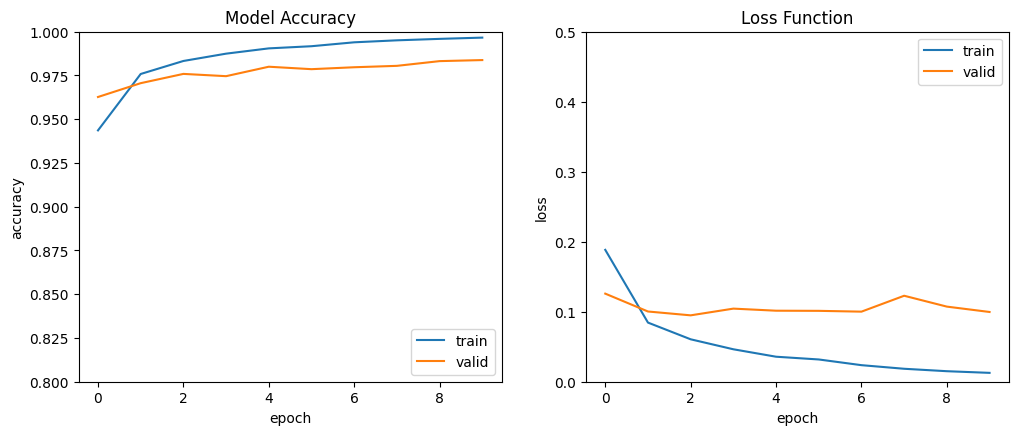

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('default')

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylim(0.8, 1)
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='lower right')
plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Function')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper right')
plt.ylim([0,.5])

### Observando a Acurácia (Accuracy)

Para cada uma das 10 épocas, observe as pontuações `accuracy` e `val_accuracy`. `precisão` indica o desempenho do modelo para a época em todos os dados de treinamento. `val_accuracy` indica o desempenho do modelo nos dados de validação, que, se você se lembra, não foi usado para treinar o modelo.

A modelo mandou muito bem! A precisão atingiu rapidamente perto de 100%, assim como a precisão da validação. Agora temos um modelo que pode ser usado para detectar e classificar com precisão imagens manuscritas.

O próximo passo seria usar esse modelo para classificar novas imagens manuscritas ainda não vistas. Isso é chamado de [inferência](https://blogs.nvidia.com/blog/2016/08/22/difference-deep-learning-training-inference-ai/). Exploraremos o processo de inferência em um exercício posterior.

## Resumo

Vale a pena reservar um momento para apreciar o que fizemos aqui. Historicamente, os sistemas especialistas que foram construídos para fazer esse tipo de tarefa eram extremamente complicados, e as pessoas passaram suas carreiras construindo-os (confira as referências na [página oficial do MNIST](http://yann.lecun.com/exdb/mnist/) e os marcos dos anos foram alcançados).

O MNIST não é útil apenas por sua influência histórica na Visão Computacional, mas também é um ótimo [benchmark](http://www.cs.toronto.edu/~serailhydra/publications/tbd-iiswc18.pdf) e ferramenta de depuração. Está tendo problemas para fazer uma nova arquitetura sofisticada de aprendizado de máquina funcionar? Compare com o MNIST. Se não conseguir aprender neste conjunto de dados, é provável que não aprenda em imagens e conjuntos de dados mais complicados.

## Limpando a Memória

Antes de prosseguir, execute a célula a seguir para limpar a memória da GPU. Isso é necessário para passar para o próximo notebook.

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

## Next

Nesta seção, você aprendeu como construir e treinar uma rede neural simples para classificação de imagens. Na próxima seção, você será solicitado a construir sua própria rede neural e realizar a preparação de dados para resolver um problema de classificação de imagem diferente.

## ☆ Exercício Complementar ☆

Tem tempo de sobra? Na próxima seção, falaremos sobre como chegamos a alguns dos números acima, mas podemos tentar imaginar como seria ser um pesquisador desenvolvendo as técnicas comumente usadas hoje.

Em última análise, cada neurônio está tentando ajustar uma linha a alguns dados. Abaixo, temos alguns pontos de dados e uma linha desenhada aleatoriamente usando a equação [y = mx + b](https://www.mathsisfun.com/equation_of_line.html).

Tente alterar o `m` e o `b` para encontrar a menor perda possível. Como você encontrou a melhor linha? Você pode fazer um programa para seguir sua estratégia?

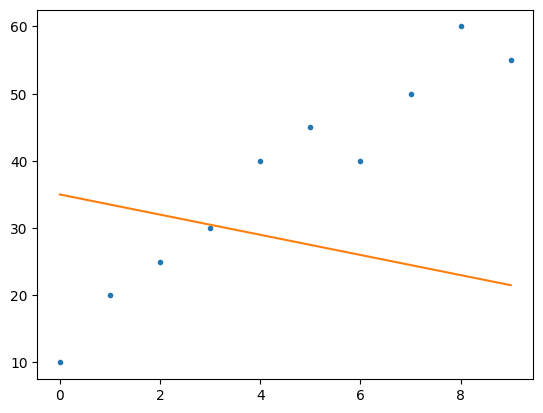

Loss: 462.125


In [7]:
import numpy as np
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

m = -1.5  # -2 to start, change me please
b = 35  # 40 to start, change me please

# Sample data
x = np.array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9])
y = np.array([10, 20, 25, 30, 40, 45, 40, 50, 60, 55])
y_hat = x * m + b

plt.plot(x, y, '.')
plt.plot(x, y_hat, '-')
plt.show()

print("Loss:", np.sum((y - y_hat)**2)/len(x))

Teve uma ideia? Excelente! Por favor, desligue o kernel antes de prosseguir.

In [ ]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}

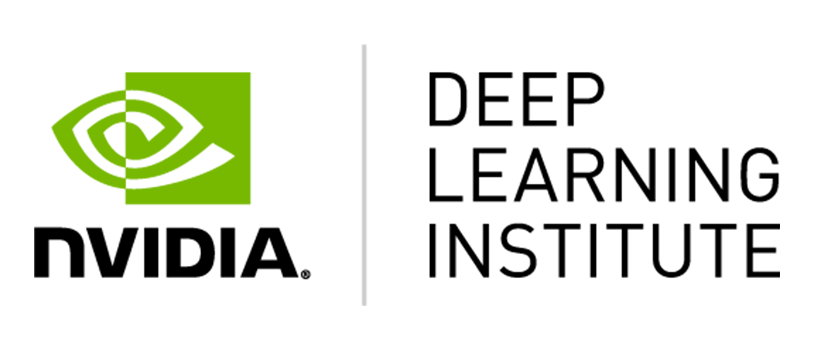